
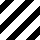
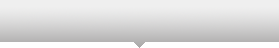
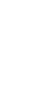
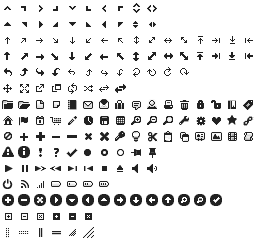
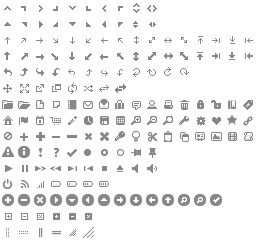
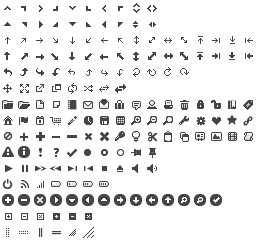
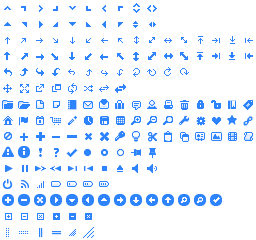
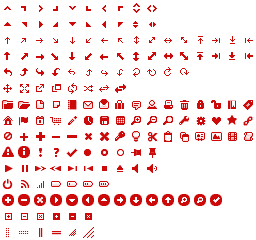
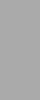
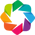
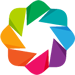
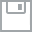
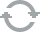
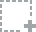
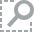
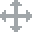
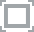
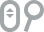

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.plotting import figure,output_notebook,show,VBox,HBox,gridplot 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
output_notebook()

In [46]:
cols = ['preg_count','gluc_conc','dias_bp','tri_skin_cm','2hr_insulin','bmi','db_ped','age','class']

df = pd.read_csv('pima-indians-diabetes-data.csv',names=cols)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg_count     768 non-null int64
gluc_conc      768 non-null int64
dias_bp        768 non-null int64
tri_skin_cm    768 non-null int64
2hr_insulin    768 non-null int64
bmi            768 non-null float64
db_ped         768 non-null float64
age            768 non-null int64
class          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


preg_count   gluc_conc     dias_bp  tri_skin_cm  2hr_insulin  \
count  768.000000  768.000000  768.000000   768.000000   768.000000   
mean     3.845052  120.894531   69.105469    20.536458    79.799479   
std      3.369578   31.972618   19.355807    15.952218   115.244002   
min      0.000000    0.000000    0.000000     0.000000     0.000000   
25%      1.000000   99.000000   62.000000     0.000000     0.000000   
50%      3.000000  117.000000   72.000000    23.000000    30.500000   
75%      6.000000  140.250000   80.000000    32.000000   127.250000   
max     17.000000  199.000000  122.000000    99.000000   846.000000   

              bmi      db_ped         age       class  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [ ]:
# This dataset contains biological data on 768 females of Pima Indian heritage, including whether
# the participants in the study have diabetes. This data can be interpreted as a set of indicators for
# the detection of diabetes.

# In trying to determine factors that indicate the presence of diabetes, I would focus on:
#   - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#   - Diastolic blood pressure (mm Hg) 
#   - Triceps skin fold thickness (mm) 
#   - 2-Hour serum insulin (mu U/ml)
#   - Body mass index (weight in kg/(height in m)^2) 
#   - Diabetes pedigree function

# In other words, the second column through the seventh column in the dataframe

In [47]:
# Looks like most columns contain some zeroes. Let's start with glucose concentration. This test
# measures glucose values in the blood two hours after ingesting a sugary drink. The mean is
# 120, so values of zero appear to be incorrect.

df[df['gluc_conc'] == 0]

preg_count  gluc_conc  dias_bp  tri_skin_cm  2hr_insulin   bmi  db_ped  \
75            1          0       48           20            0  24.7   0.140   
182           1          0       74           20           23  27.7   0.299   
342           1          0       68           35            0  32.0   0.389   
349           5          0       80           32            0  41.0   0.346   
502           6          0       68           41            0  39.0   0.727   

     age  class  
75    22      0  
182   21      0  
342   22      0  
349   37      1  
502   41      1

In [48]:
#Since there are only 5 affected rows, we will drop them. 

df = df[df['gluc_conc'] != 0]

df.describe().T

count        mean         std     min      25%      50%  \
preg_count     763    3.851900    3.374729   0.000   1.0000    3.000   
gluc_conc      763  121.686763   30.535641  44.000  99.0000  117.000   
dias_bp        763   69.115334   19.399240   0.000  62.0000   72.000   
tri_skin_cm    763   20.477064   15.973171   0.000   0.0000   23.000   
2hr_insulin    763   80.292267  115.457448   0.000   0.0000   36.000   
bmi            763   31.986763    7.893221   0.000  27.3000   32.000   
db_ped         763    0.472477    0.331963   0.078   0.2435    0.374   
age            763   33.271298   11.772161  21.000  24.0000   29.000   
class          763    0.348624    0.476847   0.000   0.0000    0.000   

                  75%     max  
preg_count     6.0000   17.00  
gluc_conc    141.0000  199.00  
dias_bp       80.0000  122.00  
tri_skin_cm   32.0000   99.00  
2hr_insulin  128.5000  846.00  
bmi           36.5500   67.10  
db_ped         0.6265    2.42  
age           41.0000   81.00  
class          1.0000    1.00

Missing values: 35


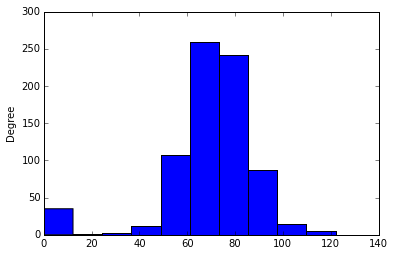

In [54]:
# Next up is diastolic blood pressure (pressure on arteries between heartbeats).
# Cannot have a blood pressure of zero...

print "Missing values: %d" %(df.dias_bp[df['dias_bp'] == 0].count())

df['dias_bp'].plot(kind='hist')

72.43818681318682

In [56]:
# Since the distribution of this data resembles a normal distribution, I'll replace values of zero
# with the mean diastolic blood pressure

df.dias_bp[df['dias_bp'] == 0] = df.dias_bp[df['dias_bp'] != 0].mean()

df.describe().T

count        mean         std     min      25%         50%  \
preg_count     763    3.851900    3.374729   0.000   1.0000    3.000000   
gluc_conc      763  121.686763   30.535641  44.000  99.0000  117.000000   
dias_bp        763   72.438187   12.098308  24.000  64.0000   72.438187   
tri_skin_cm    763   20.477064   15.973171   0.000   0.0000   23.000000   
2hr_insulin    763   80.292267  115.457448   0.000   0.0000   36.000000   
bmi            763   31.986763    7.893221   0.000  27.3000   32.000000   
db_ped         763    0.472477    0.331963   0.078   0.2435    0.374000   
age            763   33.271298   11.772161  21.000  24.0000   29.000000   
class          763    0.348624    0.476847   0.000   0.0000    0.000000   

                  75%     max  
preg_count     6.0000   17.00  
gluc_conc    141.0000  199.00  
dias_bp       80.0000  122.00  
tri_skin_cm   32.0000   99.00  
2hr_insulin  128.5000  846.00  
bmi           36.5500   67.10  
db_ped         0.6265    2.42  
age           41.0000   81.00  
class          1.0000    1.00

Missing values: 227


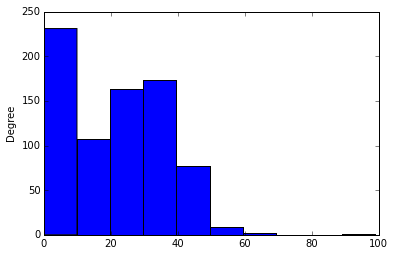

In [57]:
# Let's look at the tricep skin thickness feature:

print "Missing values: %d" %(df.tri_skin_cm[df['tri_skin_cm'] == 0].count())

df['tri_skin_cm'].plot(kind='hist')

In [59]:
# There are a large amount of missing values (227). Since there aren't any other columns I can use
# to estimate this value, I will assign the median to triceps skin values of zero.
df.tri_skin_cm[df['tri_skin_cm'] == 0] = df.tri_skin_cm[df['tri_skin_cm'] != 0].median()

df.describe().T

count        mean         std     min      25%         50%  \
preg_count     763    3.851900    3.374729   0.000   1.0000    3.000000   
gluc_conc      763  121.686763   30.535641  44.000  99.0000  117.000000   
dias_bp        763   72.438187   12.098308  24.000  64.0000   72.438187   
tri_skin_cm    763   29.104849    8.793908   7.000  25.0000   29.000000   
2hr_insulin    763   80.292267  115.457448   0.000   0.0000   36.000000   
bmi            763   31.986763    7.893221   0.000  27.3000   32.000000   
db_ped         763    0.472477    0.331963   0.078   0.2435    0.374000   
age            763   33.271298   11.772161  21.000  24.0000   29.000000   
class          763    0.348624    0.476847   0.000   0.0000    0.000000   

                  75%     max  
preg_count     6.0000   17.00  
gluc_conc    141.0000  199.00  
dias_bp       80.0000  122.00  
tri_skin_cm   32.0000   99.00  
2hr_insulin  128.5000  846.00  
bmi           36.5500   67.10  
db_ped         0.6265    2.42  
age           41.0000   81.00  
class          1.0000    1.00

Zero values: 370


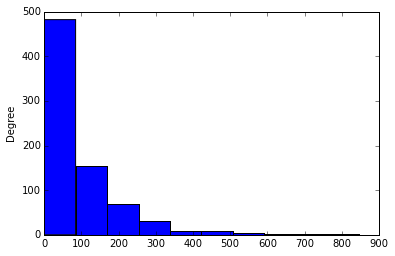

In [62]:
print "Zero values: %d" %(df['2hr_insulin'][df['2hr_insulin'] == 0].count())

df['2hr_insulin'].plot(kind='hist')

In [63]:
# Since a vast majority of these values are zero, we will leave the 2 hour insulin test feature alone

Missing values: 11


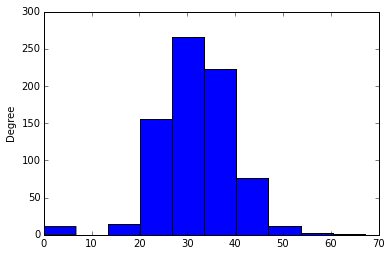

In [93]:
# Let's look at the BMI feature:

print "Missing values: %d" %(df.bmi[df['bmi'] == 0].count())

df['bmi'].plot(kind='hist')


In [94]:
# There are only 11 missing values, so we will drop them

df = df[df['bmi'] != 0]

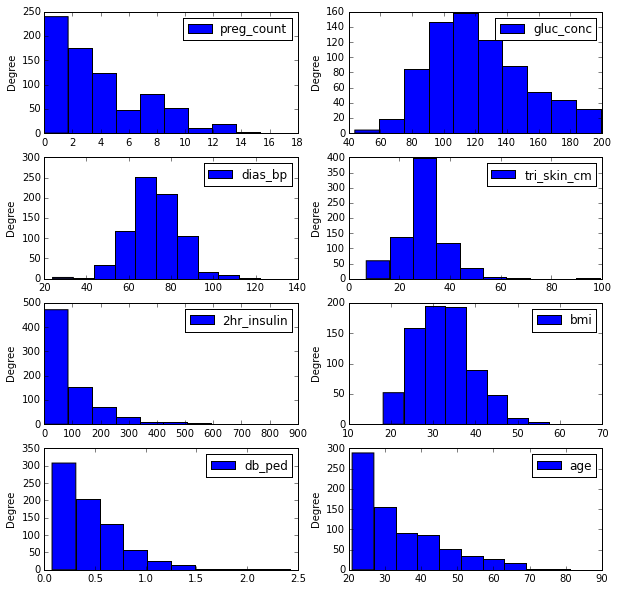

In [95]:
# There are eight features. Now we will visualize all the distributions after imputing the missing values:

features = ['preg_count','gluc_conc','dias_bp','tri_skin_cm','2hr_insulin','bmi','db_ped','age']
grid = zip([0,0,1,1,2,2,3,3],[0,1]*4)
graph_tups = zip(features,grid)

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(10,10))


for col,location in graph_tups:
    df[col].plot(kind='hist',ax=axes[location],legend=True)

In [96]:
# Checking to see whether the data is sorted by label

df

preg_count  gluc_conc    dias_bp  tri_skin_cm  2hr_insulin   bmi  db_ped  \
0             6        148  72.000000           35            0  33.6   0.627   
1             1         85  66.000000           29            0  26.6   0.351   
2             8        183  64.000000           29            0  23.3   0.672   
3             1         89  66.000000           23           94  28.1   0.167   
4             0        137  40.000000           35          168  43.1   2.288   
5             5        116  74.000000           29            0  25.6   0.201   
6             3         78  50.000000           32           88  31.0   0.248   
7            10        115  72.438187           29            0  35.3   0.134   
8             2        197  70.000000           45          543  30.5   0.158   
10            4        110  92.000000           29            0  37.6   0.191   
11           10        168  74.000000           29            0  38.0   0.537   
12           10        139  80.000000           29            0  27.1   1.441   
13            1        189  60.000000           23          846  30.1   0.398   
14            5        166  72.000000           19          175  25.8   0.587   
15            7        100  72.438187           29            0  30.0   0.484   
16            0        118  84.000000           47          230  45.8   0.551   
17            7        107  74.000000           29            0  29.6   0.254   
18            1        103  30.000000           38           83  43.3   0.183   
19            1        115  70.000000           30           96  34.6   0.529   
20            3        126  88.000000           41          235  39.3   0.704   
21            8         99  84.000000           29            0  35.4   0.388   
22            7        196  90.000000           29            0  39.8   0.451   
23            9        119  80.000000           35            0  29.0   0.263   
24           11        143  94.000000           33          146  36.6   0.254   
25           10        125  70.000000           26          115  31.1   0.205   
26            7        147  76.000000           29            0  39.4   0.257   
27            1         97  66.000000           15          140  23.2   0.487   
28           13        145  82.000000           19          110  22.2   0.245   
29            5        117  92.000000           29            0  34.1   0.337   
30            5        109  75.000000           26            0  36.0   0.546   
..          ...        ...        ...          ...          ...   ...     ...   
738           2         99  60.000000           17          160  36.6   0.453   
739           1        102  74.000000           29            0  39.5   0.293   
740          11        120  80.000000           37          150  42.3   0.785   
741           3        102  44.000000           20           94  30.8   0.400   
742           1        109  58.000000           18          116  28.5   0.219   
743           9        140  94.000000           29            0  32.7   0.734   
744          13        153  88.000000           37          140  40.6   1.174   
745          12        100  84.000000           33          105  30.0   0.488   
746           1        147  94.000000           41            0  49.3   0.358   
747           1         81  74.000000           41           57  46.3   1.096   
748           3        187  70.000000           22          200  36.4   0.408   
749           6        162  62.000000           29            0  24.3   0.178   
750           4        136  70.000000           29            0  31.2   1.182   
751           1        121  78.000000           39           74  39.0   0.261   
752           3        108  62.000000           24            0  26.0   0.223   
753           0        181  88.000000           44          510  43.3   0.222   
754           8        154  78.000000           32            0  32.4   0.443   
755           1        128  88.00000

In [ ]:
# The data does not apppear to be sorted by label

In [97]:
# colormap for correlation matrix

colorMap = {0:'blue',1:'red'}
colors = [ colorMap[x] for x in df['class'] ]
#print colors

In [98]:
# KNN Classifier for Diabetes

plots = []
for feat_x in df.columns:
    for feat_y in df.columns:
        
        temp_p = figure(plot_width=200, 
                        plot_height=200, 
                        x_axis_label=feat_x, 
                        y_axis_label=feat_y
                       )
        temp_p.circle(df[feat_x], 
                      df[feat_y], 
                      line_width=1, 
                      color=colors, 
                      alpha=0.4,
                      size=5)
        
        temp_p.xaxis.axis_label_text_font_size = '9pt'
        temp_p.yaxis.axis_label_text_font_size = '9pt'

        plots.append(temp_p)

# gridplot takes nested lists of bokeh figures and arranges them on the grid in the positions given. 
# Passing None inserts a blank.

sqrt = len(plots)**0.5
gplots = np.array(plots).reshape(sqrt,sqrt)

# To convert to a square, we reshape the array into a grid with the # of rows equal to the # of columns. 

#REMEMBER: gridplot takes a list of lists, so we convert gplots with the .tolists() method
a = gridplot(gplots.tolist())
show(a)

In [123]:
# KNN Model

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X = df.ix[:,:-1].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)

pima_knn = KNeighborsClassifier(3).fit(X_train,y_train)
pima_knn.predict(X_test)
pima_knn.score(X_test, y_test)

0.72185430463576161

In [125]:
print "Five fold score for KNN: %f" %(np.mean(cross_val_score(pima_knn,X,y,cv=5)))

Five fold score for KNN: 0.706123


In [121]:
scores = []

for i in range(1,51):
    pima_knn_plot = KNeighborsClassifier(i).fit(X_train,y_train)
    scores.append(np.mean(cross_val_score(pima_knn_plot,X,y,cv=5)))

x1 = range(1,51)
x2 = scores
    
p = figure(title="Model Accuracy vs. Number of Neighbors", x_axis_label='Number of Neighbors', y_axis_label='5-Fold CV Error')

p.line(x1, x2, legend="Accuracy", line_width=2,color='blue')
show(p)

In [128]:
# NB Model

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

nb.fit(X_train, y_train)

preds = nb.predict(X_test)

print metrics.accuracy_score(y_test, preds)
print metrics.confusion_matrix(y_test, preds)


0.609271523179
[[69 35]
 [24 23]]


In [131]:
print "Five fold score for Naïve Bayes: %f" %(np.mean(cross_val_score(nb,X,y,cv=5)))
print "Five fold score for KNN: %f" %(np.mean(cross_val_score(pima_knn,X,y,cv=5)))

Five fold score for Naïve Bayes: 0.587621
Five fold score for KNN: 0.706123


In [132]:
# Conclusion: KNN is a more accurate model for this data. 
